# **Lab2. Аппроксимация функции**

Okapova Akerke

15BD02047

okapova.akerke@gmail.com

http://github.com/akerukesha

Рассмотрим сложную математическую функцию на отрезке [1, 15]:

In [10]:
import numpy as np
import math
from scipy.linalg import solve
from matplotlib import pylab as plt

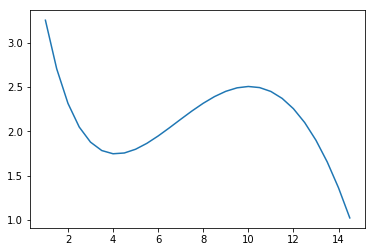

In [16]:
x = np.arange(1, 15, .5)
def func(x):
    return np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)

y = func(x)
plt.plot(x, y)
plt.show()

Она может описывать, например, зависимость оценок, которые выставляют определенному сорту вина эксперты, в зависимости от возраста этого вина. По сути, задача машинного обучения состоит в том, чтобы приблизить сложную зависимость с помощью функции из определенного семейства. В этом задании мы будем приближать указанную функцию с помощью многочленов.
Как известно, многочлен степени n (то есть w_0 + w_1 x + w_2 x^2 + ... + w_n x^n) однозначно определяется любыми n + 1 различными точками, через которые он проходит. Это значит, что его коэффициенты w_0, ... w_n можно определить из следующей системы линейных уравнений:


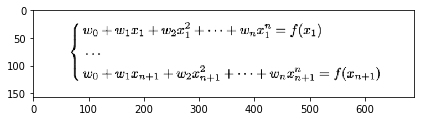

In [17]:
from skimage.io import imshow
imshow('polynomial.png')

где через x_1, ..., x_n, x_{n+1} обозначены точки, через которые проходит многочлен, а через f(x_1), ..., f(x_n), f(x_{n+1}) — значения, которые он должен принимать в этих точках.

Воспользуемся описанным свойством и будем находить приближение функции многочленом, решая систему линейных уравнений.
1. Сформируйте систему линейных уравнений (то есть задайте матрицу коэффициентов A и свободный вектор b) для многочлена первой степени, который должен совпадать с функцией f в точках 1 и 15. Решите данную систему с помощью функции scipy.linalg.solve. Нарисуйте функцию f и полученный многочлен. Хорошо ли он приближает исходную функцию?
2. Повторите те же шаги для многочлена второй степени, который совпадает с функцией f в точках 1, 8 и 15. Улучшилось ли качество аппроксимации?
3. Повторите те же шаги для многочлена третьей степени, который совпадает с функцией f в точках 1, 4, 10 и 15. Хорошо ли он аппроксимирует функцию? Коэффициенты данного многочлена (четыре числа в следующем порядке: w_0, w_1, w_2, w_3) являются ответом на задачу. Округлять коэффициенты не обязательно, но при желании можете произвести округление до второго знака (т.е. до числа вида 0.42).
4. Отправьте ответ, разделив числа (w_0, w_1, w_2, w_3) пробелами.

In [18]:
x11 = 1
x12 = 15

y11 = func(x11)
y12 = func(x12)

a1 = np.array([[1, x11], [1, x12]])
b1 = np.array([y11, y12])
w1 = solve(a1, b1)
print(w1)

[ 3.43914511 -0.18692825]


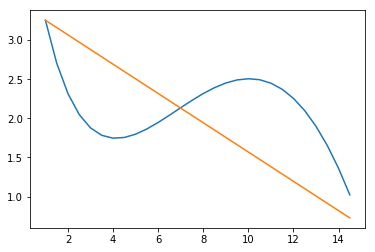

In [19]:
y1 = sum(w1[i] * x**i for i in range(2))
plt.plot(x, y, '-', x, y1, '-')
plt.show()

In [21]:
x21 = 1
x22 = 8
x23 = 15

y21 = func(x21)
y22 = func(x22)
y23 = func(x23)

a2 = np.array([[1, x21, x21**2], [1, x22, x22**2], [1, x23, x23**2]])
b2 = np.array([y21, y22, y23])
w2 = solve(a2, b2)
print(w2)

[ 3.32512949 -0.06531159 -0.00760104]


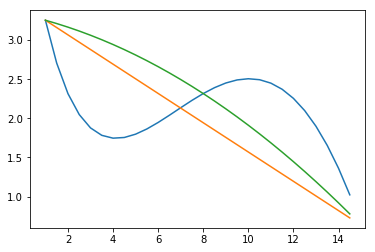

In [22]:
y2 = sum(w2[i] * x**i for i in range(3))
plt.plot(x, y, '-', x, y1, '-', x, y2, '-')
plt.show()

In [23]:
x31= 1
x32 = 4
x33 = 10
x34 = 15

y31 = func(x31)
y32 = func(x32)
y33 = func(x33)
y34 = func(x34)

a3 = np.array([[1, x31, x31**2, x31**3], [1, x32, x32**2, x32**3], [1, x33, x33**2, x33**3], [1, x34, x34**2, x34**3]])
b3 = np.array([y31, y32, y33, y34])
w3 = solve(a3, b3)
print(w3)

[ 4.36264154 -1.29552587  0.19333685 -0.00823565]


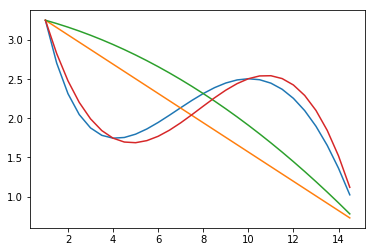

In [24]:
y3 = sum(w3[i] * x**i for i in range(4))
plt.plot(x, y, '-', x, y1, '-', x, y2, '-', x, y3, '-')
plt.show()

In [25]:
print(w3)

[ 4.36264154 -1.29552587  0.19333685 -0.00823565]
